Importing relevant libraries

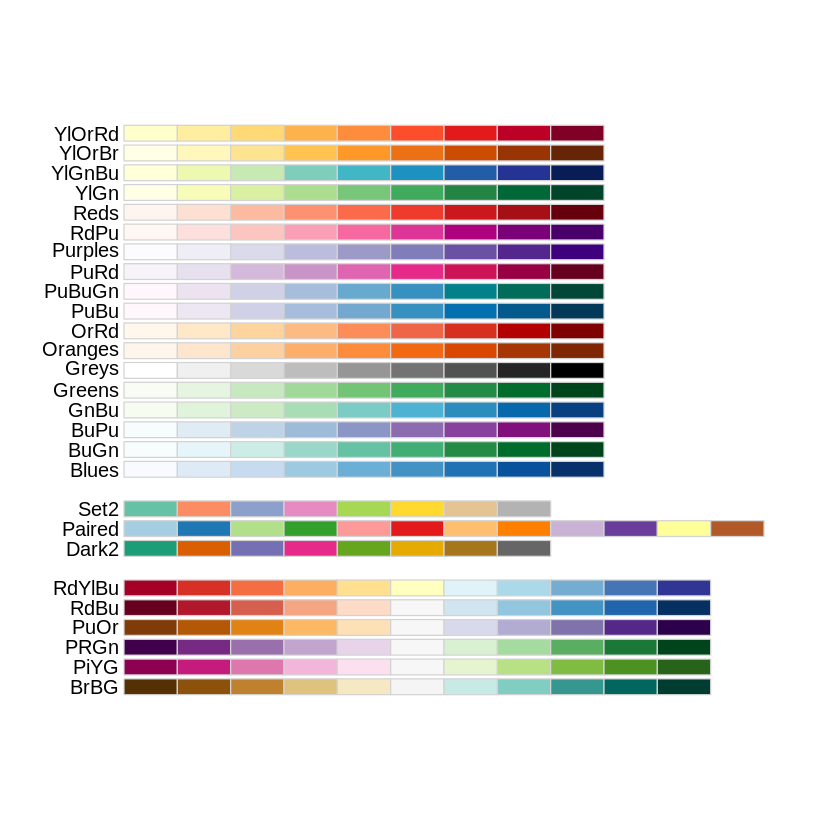

In [13]:
library(tidyverse)
library(readxl)
library(repr)
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)
options(repr.matrix.max.rows = 10)

Loading data

In [2]:
cius_2020_dem <- read_excel("data/CIUS_2020_DEM.xlsx") 
cius_2018_dem <- read_excel("data/CIUS_2018_DEM.xlsx")
cius_2020_dem
cius_2018_dem

GENDER,AGE_GRP,UI_060A
<dbl>,<dbl>,<dbl>
1,6,4
2,6,2
2,2,4
2,3,6
2,6,2
⋮,⋮,⋮
2,2,3
1,2,5
1,4,5


GENDER,AGE_GRP,UI_210A
<dbl>,<chr>,<dbl>
2,03,4
1,05,6
1,05,2
2,04,1
1,01,3
⋮,⋮,⋮
1,06,1
1,03,4
1,04,1


Cleaning and filtering data

In [3]:
cius_2020_dem_clean <- cius_2020_dem |> filter(UI_060A <= 6) |> select(GENDER, AGE_GRP)
cius_2018_dem_clean <- cius_2018_dem |> mutate(AGE_GRP = as.numeric(AGE_GRP)) |> filter(UI_210A <= 5) |> select(GENDER, AGE_GRP)
cius_2020_dem_clean
cius_2018_dem_clean

GENDER,AGE_GRP
<dbl>,<dbl>
1,6
2,6
2,2
2,3
2,6
⋮,⋮
2,4
2,2
1,2


GENDER,AGE_GRP
<dbl>,<dbl>
2,3
1,5
2,4
1,1
2,4
⋮,⋮
1,6
1,3
1,4


Determining number of respondents by gender in 2018

In [4]:
total_2018 <- nrow(cius_2018_dem_clean)

gender_2018 <- cius_2018_dem_clean |> group_by(GENDER) |>
    summarize(count = n()) |>
bind_cols("GENDER_LABEL" = c("male", "female")) |>
mutate("PCT" = (count / total_2018) * 100)
gender_2018



GENDER,count,GENDER_LABEL,PCT
<dbl>,<int>,<chr>,<dbl>
1,5764,male,48.23027
2,6187,female,51.76973


Determining number of respondents by gender in 2020

In [5]:
total_2020 <- nrow(cius_2020_dem_clean)
gender_2020 <- cius_2020_dem_clean |> group_by(GENDER) |>
    summarize(count = n()) |>
bind_cols("GENDER_LABEL" = c("male", "female")) |>
mutate("PCT" = (count / total_2020) * 100)
gender_2020

GENDER,count,GENDER_LABEL,PCT
<dbl>,<int>,<chr>,<dbl>
1,7014,male,46.81305
2,7969,female,53.18695


Plotting gender demographics data

Saving 6.67 x 6.67 in image


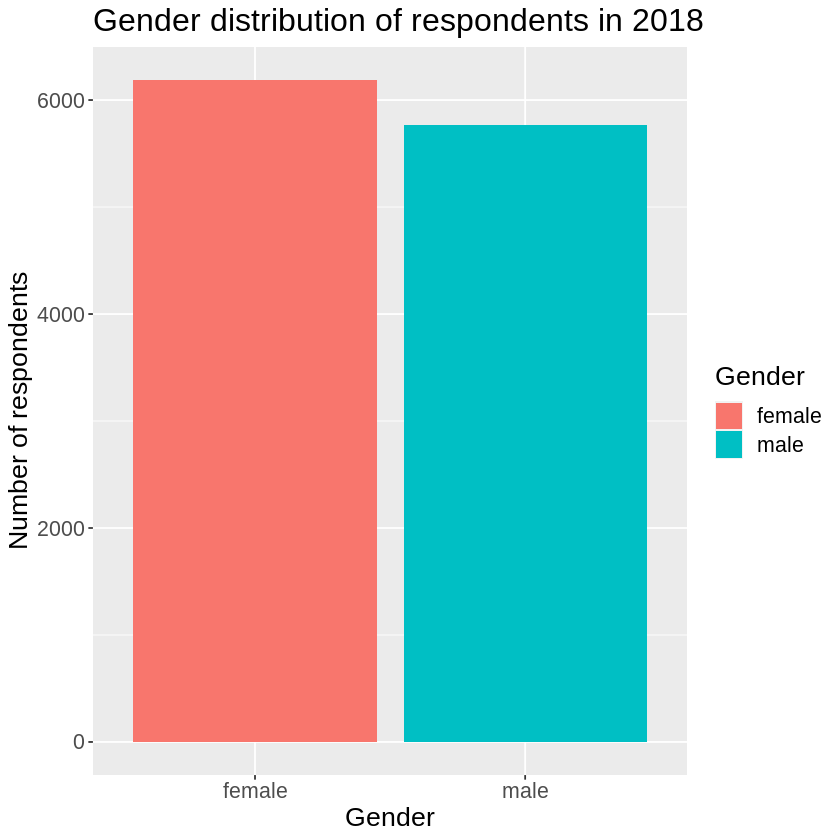

In [6]:
gender_2018_plot <- ggplot(gender_2018, aes(x = GENDER_LABEL, y = count, fill = GENDER_LABEL)) + 
    geom_bar(stat = "identity") + 
   xlab("Gender") +
   ylab("Number of respondents") +
   labs(fill = "Gender") +
  theme(text = element_text(size = 16)) +
ggtitle("Gender distribution of respondents in 2018")
gender_2018_plot
ggsave("images/gender_2018_plot.png", gender_2018_plot)

Saving 6.67 x 6.67 in image


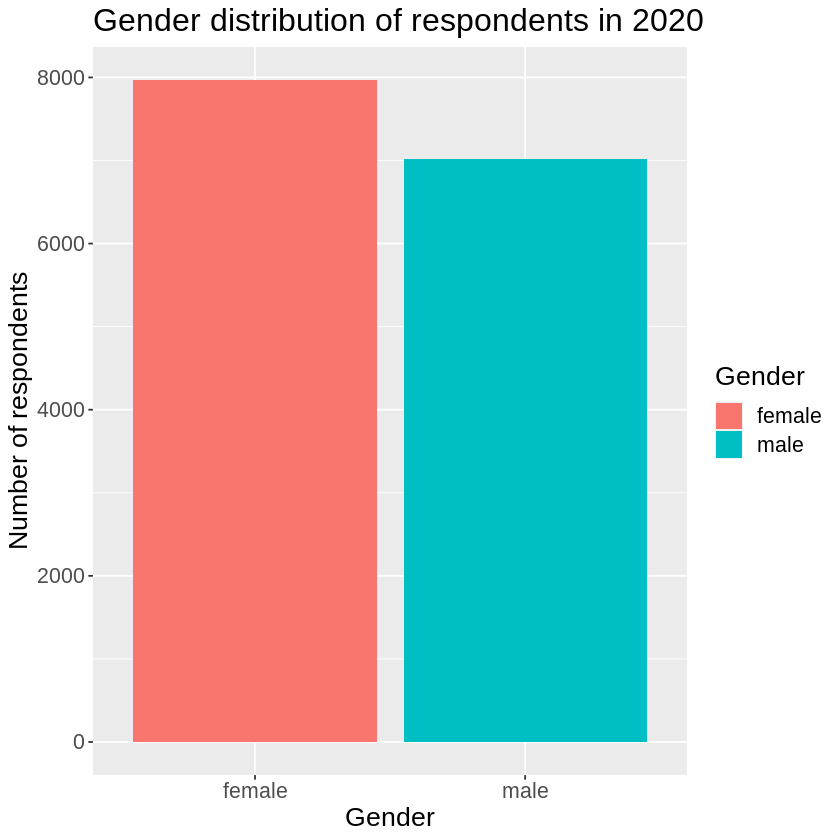

In [7]:
gender_2020_plot <- ggplot(gender_2020, aes(x = GENDER_LABEL, y = count, fill = GENDER_LABEL)) +
    geom_bar(stat = "identity") + 
   xlab("Gender") +
   ylab("Number of respondents") +
   labs(fill = "Gender") +
  theme(text = element_text(size = 16)) +
ggtitle("Gender distribution of respondents in 2020")
gender_2020_plot
ggsave("images/gender_2020_plot.png", gender_2020_plot)

Determining number of respondents by age group in 2018

In [8]:
age_2018 <- cius_2018_dem_clean |> group_by(AGE_GRP) |>
    summarize(count = n()) |>
bind_cols("AGE_LABEL" = c("15-24", "25-34", "35-44", "45-54", "55-64", "65+")) |>
mutate("PCT" = (count / total_2018) * 100)
age_2018

AGE_GRP,count,AGE_LABEL,PCT
<dbl>,<int>,<chr>,<dbl>
1,694,15-24,5.807045
2,1492,25-34,12.484311
3,1964,35-44,16.433771
4,2079,45-54,17.396034
5,2667,55-64,22.316124
6,3055,65+,25.562714


Determining number of respondents by age group in 2020

In [9]:
age_2020 <- cius_2020_dem_clean |> group_by(AGE_GRP) |>
    summarize(count = n()) |>
bind_cols("AGE_LABEL" = c("15-24", "25-34", "35-44", "45-54", "55-64", "65+")) |>
mutate("PCT" = (count / total_2020) * 100)

age_2020

AGE_GRP,count,AGE_LABEL,PCT
<dbl>,<int>,<chr>,<dbl>
1,782,15-24,5.219248
2,1721,25-34,11.486351
3,2414,35-44,16.111593
4,2318,45-54,15.470867
5,3455,55-64,23.059467
6,4293,65+,28.652473


Plotting age group demographics data

Saving 6.67 x 6.67 in image


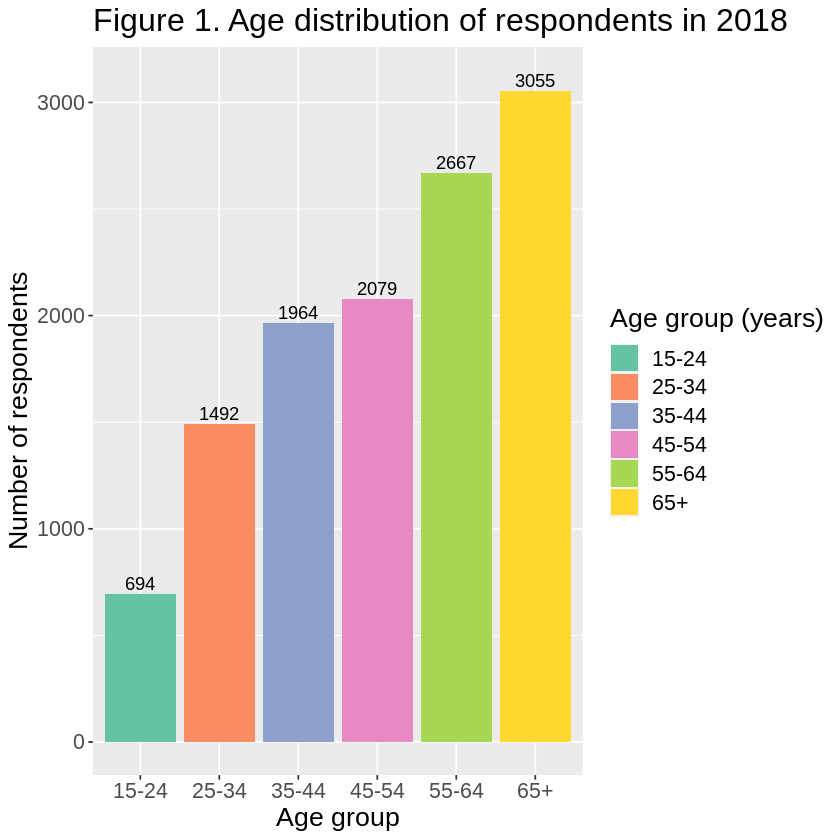

In [29]:
age_2018_plot <- ggplot(age_2018, aes(x = AGE_LABEL, y = count, fill = AGE_LABEL)) + 
    geom_bar(stat = "identity") + 
   xlab("Age group") +
   ylab("Number of respondents") +
   labs(fill = "Age group (years)") +
  theme(text = element_text(size = 16)) +
  geom_text(
     aes(label = count, y = count + 50),
      position = position_dodge(0.9)
      ) +
  scale_fill_brewer(palette = 'Set2') +
ggtitle("Figure 1. Age distribution of respondents in 2018")
age_2018_plot
ggsave("images/age_2018_plot.png", age_2018_plot)

Saving 6.67 x 6.67 in image


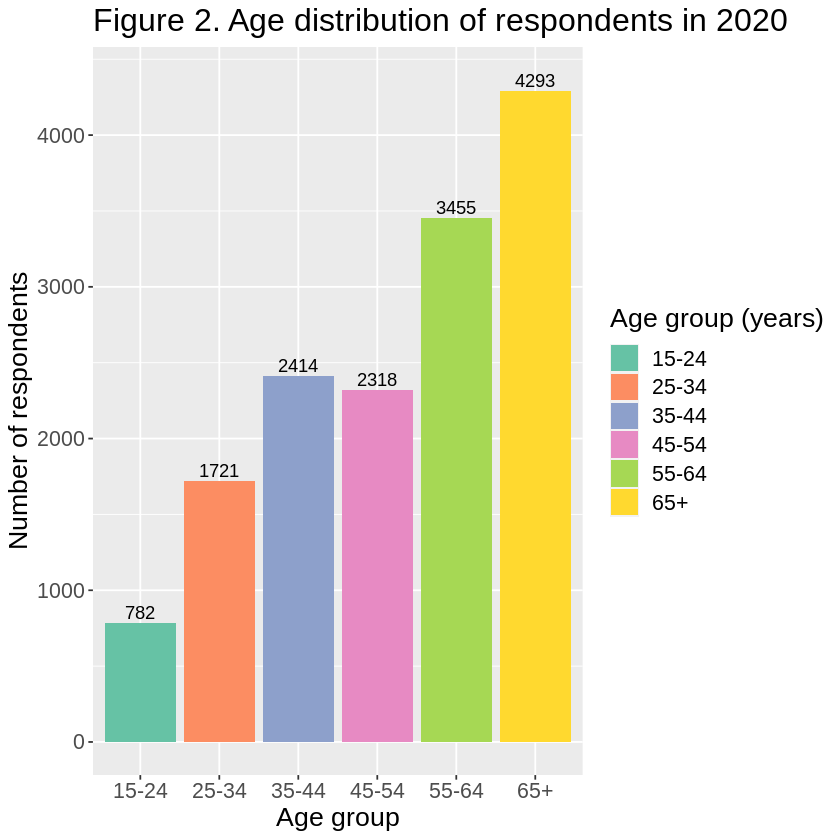

In [34]:
age_2020_plot <- ggplot(age_2020, aes(x = AGE_LABEL, y = count, fill = AGE_LABEL)) + 
    geom_bar(stat = "identity") + 
   xlab("Age group") +
   ylab("Number of respondents") +
   labs(fill = "Age group (years)") +
  theme(text = element_text(size = 16)) +
  geom_text(
     aes(label = count, y = count + 70),
      position = position_dodge(0.9)
      ) +
  scale_fill_brewer(palette = 'Set2') +
ggtitle("Figure 2. Age distribution of respondents in 2020")
age_2020_plot
ggsave("images/age_2020_plot.png", age_2020_plot)